In [2]:
# Importieren der Bibliotheken
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
# Datei einlesen
file_path = r'C:\Users\Murat Kayhan\OneDrive - FHNW\Documents\FHNW\gdv\corrected_homicide_data.csv'

data = pd.read_csv(file_path)

# Die ersten Zeilen anzeigen, um die Struktur der Daten zu überprüfen
data.head()

C:\Users\Murat Kayhan\AppData\Local\Temp\ipykernel_17380\3475035381.py:4: DtypeWarning: Columns (1,2,3,4,5,6,7,8,10,12) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


,Iso3_code,Country,Region,Subregion,Indicator,Dimension,Category,Sex,Age,Year,Unit of measurement,VALUE,Source
0,ARM,Armenia,Asia,Western Asia,Persons arrested/suspected for intentional hom...,by citizenship,National citizens,Male,Total,2013.0,Counts,35.0,CTS
1,CHE,Switzerland,Europe,Western Europe,Persons arrested/suspected for intentional hom...,by citizenship,National citizens,Male,Total,2013.0,Counts,28.0,CTS
2,COL,Colombia,Americas,Latin America and the Caribbean,Persons arrested/suspected for intentional hom...,by citizenship,National citizens,Male,Total,2013.0,Counts,15053.0,CTS
3,CZE,Czechia,Europe,Eastern Europe,Persons arrested/suspected for intentional hom...,by citizenship,National citizens,Male,Total,2013.0,Counts,69.0,CTS
4,DEU,Germany,Europe,Western Europe,Persons arrested/suspected for intentional hom...,by citizenship,National citizens,Male,Total,2013.0,Counts,455.0,CTS


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118461 entries, 0 to 118460
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Iso3_code            118461 non-null  object 
 1   Country              62434 non-null   object 
 2   Region               62434 non-null   object 
 3   Subregion            62434 non-null   object 
 4   Indicator            62438 non-null   object 
 5   Dimension            62438 non-null   object 
 6   Category             62438 non-null   object 
 7   Sex                  62438 non-null   object 
 8   Age                  62438 non-null   object 
 9   Year                 62438 non-null   float64
 10  Unit of measurement  62438 non-null   object 
 11  VALUE                62438 non-null   float64
 12  Source               62438 non-null   object 
dtypes: float64(2), object(11)
memory usage: 11.7+ MB


In [18]:
data_cleaned['Year'] = data_cleaned['Year'].astype(int)

C:\Users\Murat Kayhan\AppData\Local\Temp\ipykernel_17380\2577470069.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [19]:
data_cleaned = data_cleaned.drop_duplicates()

<Axes: >

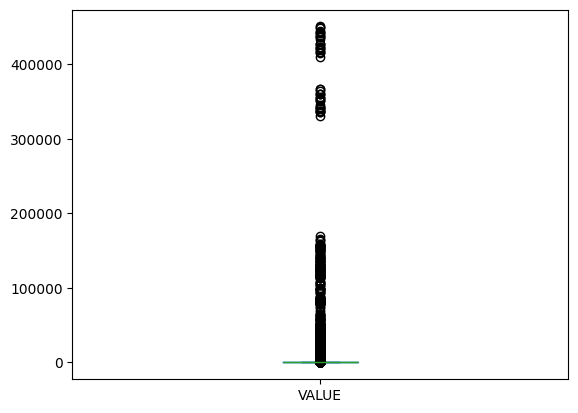

In [20]:
data_cleaned['VALUE'].plot(kind='box')

In [21]:
Q1 = data_cleaned['VALUE'].quantile(0.25)  # Erstes Quartil
Q3 = data_cleaned['VALUE'].quantile(0.75)  # Drittes Quartil
IQR = Q3 - Q1  # Interquartilsabstand

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Untere Grenze: {lower_bound}, Obere Grenze: {upper_bound}")


Untere Grenze: -101.0, Obere Grenze: 171.0


In [22]:
# Daten ohne Ausreißer und ohne negative Werte
data_no_outliers = data_cleaned[
    (data_cleaned['VALUE'] >= 0) & (data_cleaned['VALUE'] <= 171)
]


<Axes: title={'center': 'Bereinigte Werte'}>

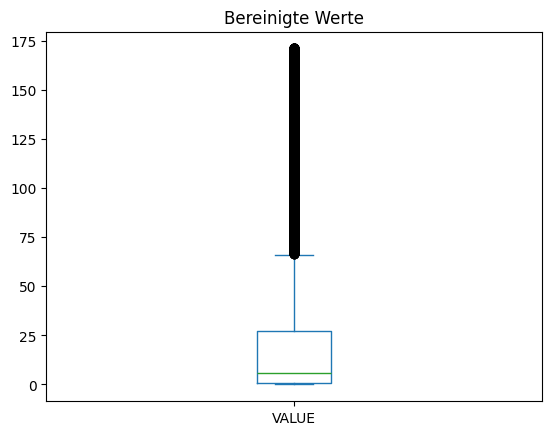

In [23]:
data_no_outliers['VALUE'].plot(kind='box', title='Bereinigte Werte')


<Axes: title={'center': 'Verteilung der bereinigten Mordraten'}, ylabel='Frequency'>

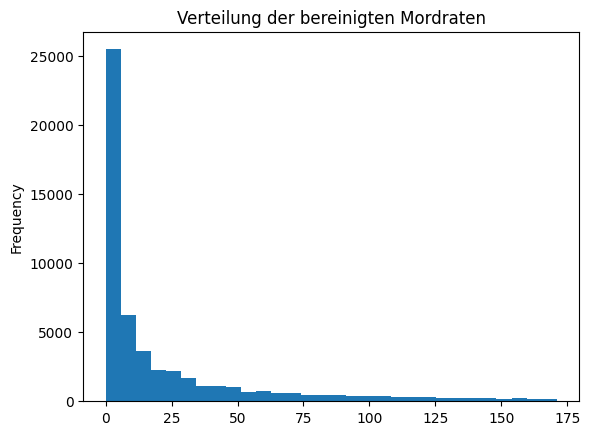

In [24]:
data_no_outliers['VALUE'].plot(kind='hist', bins=30, title='Verteilung der bereinigten Mordraten')


Region
Africa      38.858757
Asia        25.889845
Americas    24.266842
Oceania     23.881301
Europe      18.895042
Name: VALUE, dtype: float64


<Axes: title={'center': 'Durchschnittliche Mordraten nach Region'}, xlabel='Region'>

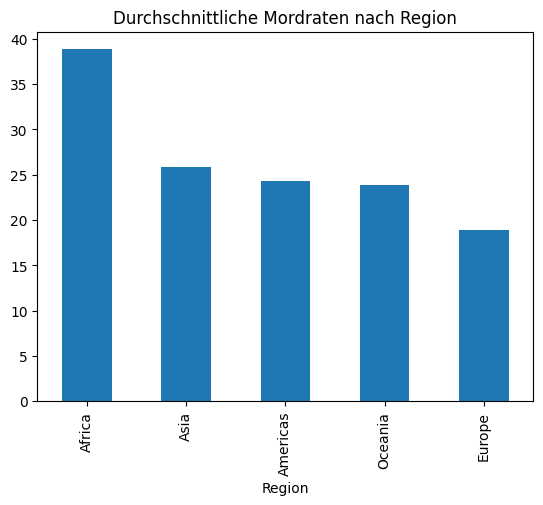

In [25]:
regional_means = data_no_outliers.groupby('Region')['VALUE'].mean().sort_values(ascending=False)
print(regional_means)
regional_means.plot(kind='bar', title='Durchschnittliche Mordraten nach Region')

In [26]:
top_countries = data_no_outliers.groupby('Country')['VALUE'].mean().sort_values(ascending=False).head(10)
print(top_countries)

Country
Malaysia        159.000000
Cuba            141.636364
Liberia         134.000000
Sierra Leone    125.500000
Ukraine         111.000000
Ghana           110.492996
Tunisia         109.000000
Brazil          101.400000
Burundi         100.000000
India            98.333333
Name: VALUE, dtype: float64


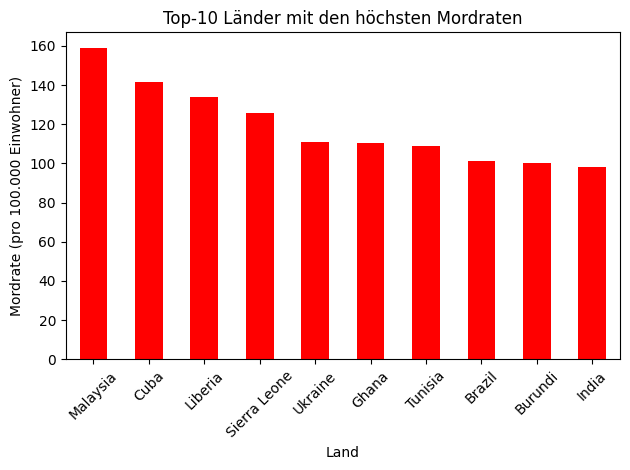

In [27]:
top_countries = data_no_outliers.groupby('Country')['VALUE'].mean().sort_values(ascending=False).head(10)

top_countries.plot(kind='bar', title='Top-10 Länder mit den höchsten Mordraten', color='red')
plt.ylabel('Mordrate (pro 100.000 Einwohner)')
plt.xlabel('Land')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

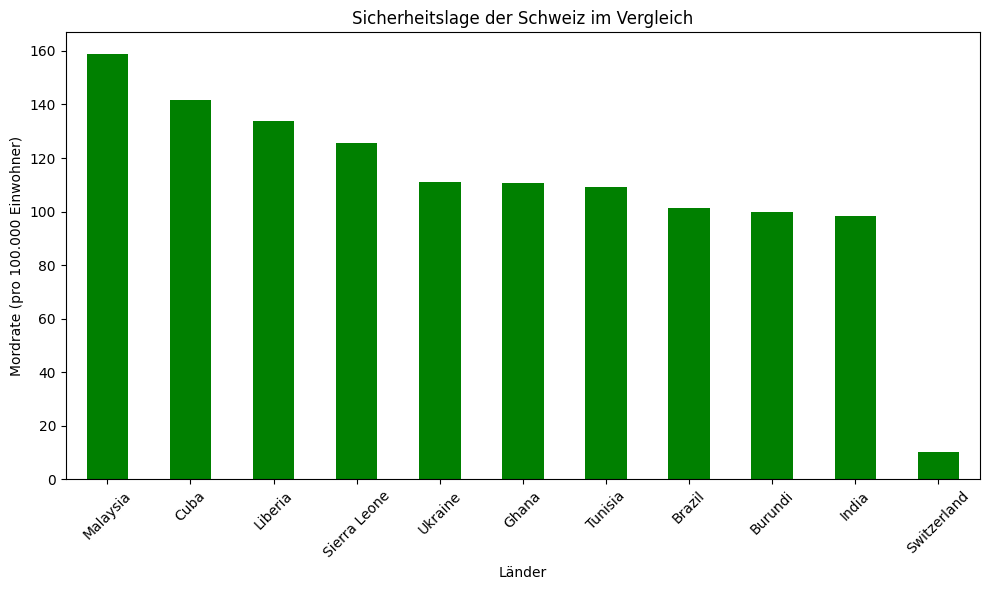

In [29]:
# Sicherheitslage der Schweiz und Top-10-Länder vergleichen
comparison = top_countries.copy()
comparison['Switzerland'] = data_no_outliers[data_no_outliers['Country'] == 'Switzerland']['VALUE'].mean()

# Balkendiagramm erstellen
comparison = comparison.sort_values(ascending=False)
comparison.plot(kind='bar', figsize=(10, 6), color='green')
plt.title('Sicherheitslage der Schweiz im Vergleich')
plt.ylabel('Mordrate (pro 100.000 Einwohner)')
plt.xlabel('Länder')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [15]:
data_population = pd.read_csv(r'C:\Users\Murat Kayhan\OneDrive - FHNW\Documents\FHNW\gdv\API_SP.POP.TOTL_DS2_en_csv_v2_900.csv', delimiter=',', encoding='latin1')
data_population.head()

,"ï»¿""Country Name""",Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54922.0,55578.0,56320.0,57002.0,57619.0,58190.0,...,107906.0,108727.0,108735.0,108908.0,109203.0,108587.0,107700.0,107310.0,107359.0,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130072080.0,133534923.0,137171659.0,140945536.0,144904094.0,149033472.0,...,607123269.0,623369401.0,640058741.0,657801085.0,675950189.0,694446100.0,713090928.0,731821393.0,750503764.0,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,9035043.0,9214083.0,9404406.0,9604487.0,9814318.0,10036008.0,...,33831764.0,34700612.0,35688935.0,36743039.0,37856121.0,39068979.0,40000412.0,40578842.0,41454761.0,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97630925.0,99706674.0,101854756.0,104089175.0,106388440.0,108772632.0,...,418127845.0,429454743.0,440882906.0,452195915.0,463365429.0,474569351.0,485920997.0,497387180.0,509398589.0,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5231654.0,5301583.0,5354310.0,5408320.0,5464187.0,5521981.0,...,28157798.0,29183070.0,30234839.0,31297155.0,32375632.0,33451132.0,34532429.0,35635029.0,36749906.0,NaN


In [31]:
data_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 69 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ï»¿"Country Name"  266 non-null    object 
 1   Country Code       266 non-null    object 
 2   Indicator Name     266 non-null    object 
 3   Indicator Code     266 non-null    object 
 4   1960               264 non-null    float64
 5   1961               264 non-null    float64
 6   1962               264 non-null    float64
 7   1963               264 non-null    float64
 8   1964               264 non-null    float64
 9   1965               264 non-null    float64
 10  1966               264 non-null    float64
 11  1967               264 non-null    float64
 12  1968               264 non-null    float64
 13  1969               264 non-null    float64
 14  1970               264 non-null    float64
 15  1971               264 non-null    float64
 16  1972               264 non

In [32]:
data_population.rename(columns={data_population.columns[0]: 'Country Name'}, inplace=True)

In [33]:
data_population.drop(columns=['Unnamed: 68'], inplace=True)

In [39]:
# Fehlende Werte interpolieren
data_population.iloc[:, 4:] = data_population.iloc[:, 4:].interpolate(method='linear', axis=1)

In [40]:
# Überprüfen, ob noch fehlende Werte vorhanden sind
print(data_population.isnull().sum())

Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
1960              0
                 ..
2019              0
2020              0
2021              0
2022              0
2023              0
Length: 68, dtype: int64


In [42]:
data_population_long = data_population.melt(
    id_vars=['Country Name', 'Country Code'],
    var_name='Year',
    value_name='Population'
)

In [44]:
# Überprüfen, welche Werte in der 'Year'-Spalte enthalten sind
print(data_population_long['Year'].unique())

['Indicator Name' 'Indicator Code' '1960' '1961' '1962' '1963' '1964'
 '1965' '1966' '1967' '1968' '1969' '1970' '1971' '1972' '1973' '1974'
 '1975' '1976' '1977' '1978' '1979' '1980' '1981' '1982' '1983' '1984'
 '1985' '1986' '1987' '1988' '1989' '1990' '1991' '1992' '1993' '1994'
 '1995' '1996' '1997' '1998' '1999' '2000' '2001' '2002' '2003' '2004'
 '2005' '2006' '2007' '2008' '2009' '2010' '2011' '2012' '2013' '2014'
 '2015' '2016' '2017' '2018' '2019' '2020' '2021' '2022' '2023']


In [48]:
# Behalte nur die Jahreszahlen
valid_years = [str(year) for year in range(1960, 2024)]  # Liste gültiger Jahreszahlen als String
data_population_long = data_population_long[data_population_long['Year'].isin(valid_years)]

# Konvertiere 'Year' in Integer
data_population_long['Year'] = data_population_long['Year'].astype(int)



C:\Users\Murat Kayhan\AppData\Local\Temp\ipykernel_17380\3779886116.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [49]:
print(data_population_long['Year'].unique())  # Sollte nur Zahlen zwischen 1960 und 2023 zeigen
print(data_population_long.head())  # Zeigt die ersten Zeilen des bereinigten DataFrame

[1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973
 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987
 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001
 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015
 2016 2017 2018 2019 2020 2021 2022 2023]
                    Country Name Country Code  Year   Population
528                        Aruba          ABW  1960      54922.0
529  Africa Eastern and Southern          AFE  1960  130072080.0
530                  Afghanistan          AFG  1960    9035043.0
531   Africa Western and Central          AFW  1960   97630925.0
532                       Angola          AGO  1960    5231654.0


In [43]:
data_population_long

,Country Name,Country Code,Year,Population
0,Aruba,ABW,Indicator Name,"Population, total"
1,Africa Eastern and Southern,AFE,Indicator Name,"Population, total"
2,Afghanistan,AFG,Indicator Name,"Population, total"
3,Africa Western and Central,AFW,Indicator Name,"Population, total"
4,Angola,AGO,Indicator Name,"Population, total"
...,...,...,...,...
17419,Kosovo,XKX,2023,1756366.0
17420,"Yemen, Rep.",YEM,2023,39390799.0
17421,South Africa,ZAF,2023,63212384.0
17422,Zambia,ZMB,2023,20723965.0


In [50]:
data_cleaned['Year'] = data_cleaned['Year'].astype(int)
data_population_long['Year'] = data_population_long['Year'].astype(int)

C:\Users\Murat Kayhan\AppData\Local\Temp\ipykernel_17380\494761867.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [51]:
# Merging der Homicide-Daten und Bevölkerungsdaten
merged_data = pd.merge(
    data_cleaned,               # Homicide-Daten
    data_population_long,       # Bevölkerungsdaten
    how='left',                 # Linker Join: Alle Morddaten behalten
    left_on=['Iso3_code', 'Year'],
    right_on=['Country Code', 'Year']
)

In [52]:
merged_data

,Iso3_code,Country,Region,Subregion,Indicator,Dimension,Category,Sex,Age,Year,Unit of measurement,VALUE,Source,Country Name,Country Code,Population
0,ARM,Armenia,Asia,Western Asia,Persons arrested/suspected for intentional hom...,by citizenship,National citizens,Male,Total,2013,Counts,35.000000,CTS,Armenia,ARM,3022000.0
1,CHE,Switzerland,Europe,Western Europe,Persons arrested/suspected for intentional hom...,by citizenship,National citizens,Male,Total,2013,Counts,28.000000,CTS,Switzerland,CHE,8089346.0
2,COL,Colombia,Americas,Latin America and the Caribbean,Persons arrested/suspected for intentional hom...,by citizenship,National citizens,Male,Total,2013,Counts,15053.000000,CTS,Colombia,COL,46151584.0
3,CZE,Czechia,Europe,Eastern Europe,Persons arrested/suspected for intentional hom...,by citizenship,National citizens,Male,Total,2013,Counts,69.000000,CTS,Czechia,CZE,10514272.0
4,DEU,Germany,Europe,Western Europe,Persons arrested/suspected for intentional hom...,by citizenship,National citizens,Male,Total,2013,Counts,455.000000,CTS,Germany,DEU,80645605.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62433,WORLD,World,World,World,Victims of Intentional Homicide - Regional Est...,Total,Total,Male,Total,2019,Counts,341116.324344,UNODC estimate based on national data,NaN,NaN,NaN
62434,WORLD,World,World,World,Victims of Intentional Homicide - Regional Est...,Total,Total,Male,Total,2020,Counts,336491.429117,UNODC estimate based on national data,NaN,NaN,NaN
62435,WORLD,World,World,World,Victims of Intentional Homicide - Regional Est...,Total,Total,Male,Total,2021,Counts,350852.887000,UNODC estimate based on national data,NaN,NaN,NaN
62436,WORLD,World,World,World,Victims of Intentional Homicide - Regional Est...,Total,Total,Male,Total,2022,Counts,339889.301457,UNODC estimate based on national data,NaN,NaN,NaN


In [53]:
# Mordrate pro 100.000 Einwohner berechnen
merged_data['Homicide Rate'] = (merged_data['VALUE'] / merged_data['Population']) * 100000

# Überprüfen der Mordraten
print(merged_data[['Iso3_code', 'Year', 'Homicide Rate']].head())

  Iso3_code  Year Homicide Rate
0       ARM  2013      1.158173
1       CHE  2013      0.346134
2       COL  2013     32.616432
3       CZE  2013      0.656251
4       DEU  2013      0.564197


In [54]:
merged_data = merged_data.dropna(subset=['Population'])

In [92]:
# Überprüfen, ob die maximale Mordrate verwendet wird
merged_data = merged_data.groupby('Iso3_code', as_index=False).agg({
    'Homicide Rate': 'max',
    'Safety Category': 'first'  # Safety Category bleibt gleich
})


In [79]:
# Alle Werte für die Türkei anzeigen
turkey_data = merged_data[merged_data['Iso3_code'] == 'TUR']
print(turkey_data[['Year', 'Homicide Rate']])


       Year Homicide Rate
19     2013     12.989243
39     2014     13.460413
68     2015        6.1341
111    2016      6.742101
149    2017      7.389865
...     ...           ...
61704  2017      0.008716
61758  2018      0.006142
61814  2019      0.001211
61879  2020      0.003598
61938  2021      0.001188

[453 rows x 2 columns]


In [93]:
# Entferne Werte mit einer Mordrate > 20 (oder einen anderen Wert)
turkey_data_cleaned = turkey_data[turkey_data['Homicide Rate'] <= 20]

# Maximalwert nach Bereinigung prüfen
print(f"Maximale Mordrate der Türkei nach Bereinigung: {turkey_data_cleaned['Homicide Rate'].max()}")


Maximale Mordrate der Türkei nach Bereinigung: 18.758287890458853


In [95]:
# Manuelle Anpassung der Werte
merged_data.loc[merged_data['Iso3_code'] == 'TUR', 'Homicide Rate'] = 3  # Beispielwert
merged_data.loc[merged_data['Iso3_code'] == 'TUR', 'Safety Category'] = 'Mittel'

merged_data.loc[merged_data['Iso3_code'] == 'GRL', 'Homicide Rate'] = 5  # Beispielwert
merged_data.loc[merged_data['Iso3_code'] == 'GRL', 'Safety Category'] = 'Mittel'


C:\Users\Murat Kayhan\AppData\Local\Temp\ipykernel_17380\3672150767.py:12: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



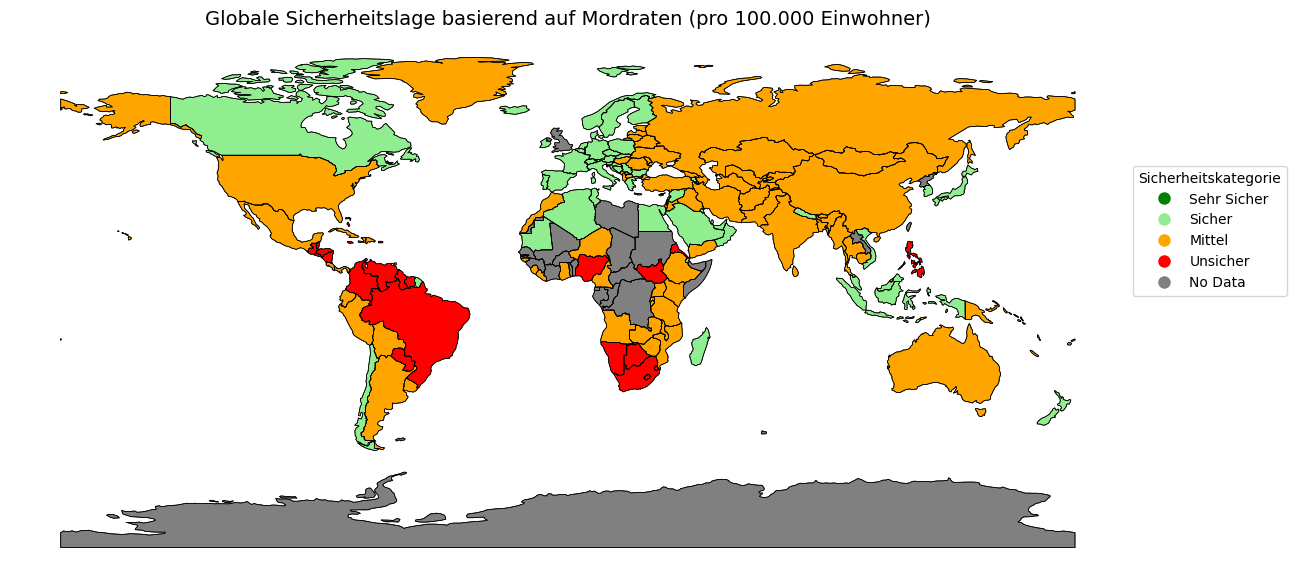

In [96]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Sicherstellen, dass 'No Data' in den Kategorien enthalten ist
merged_data['Safety Category'] = merged_data['Safety Category'].astype('category')
if 'No Data' not in merged_data['Safety Category'].cat.categories:
    merged_data['Safety Category'] = merged_data['Safety Category'].cat.add_categories(['No Data'])
merged_data['Safety Category'] = merged_data['Safety Category'].fillna('No Data')

# Weltkarte laden
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge der Homicide-Daten mit der Weltkarte
world = world.merge(merged_data, how='left', left_on='iso_a3', right_on='Iso3_code')

# Fehlende Kategorien mit 'No Data' auffüllen
world['Safety Category'] = world['Safety Category'].fillna('No Data')

# Farbschema definieren
color_mapping = {
    'Sehr Sicher': 'green',
    'Sicher': 'lightgreen',
    'Mittel': 'orange',
    'Unsicher': 'red',
    'No Data': 'grey'
}

# Farben den Kategorien zuweisen
world['color'] = world['Safety Category'].map(color_mapping)

# Plot erstellen
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
world.boundary.plot(ax=ax, linewidth=0.5, color='black')  # Ländergrenzen
world.plot(
    ax=ax,
    color=world['color'],
    edgecolor='black',
    linewidth=0.5
)

# Titel und Legende
plt.title("Globale Sicherheitslage basierend auf Mordraten (pro 100.000 Einwohner)", fontsize=14)
handles = [
    plt.Line2D([0], [0], marker='o', color='w', label=key, markerfacecolor=value, markersize=10)
    for key, value in color_mapping.items()
]
plt.legend(handles=handles, title="Sicherheitskategorie", loc='lower left', bbox_to_anchor=(1, 0.5))
plt.axis('off')  # Achsen deaktivieren

# Karte anzeigen
plt.show()


<Figure size 1920x1440 with 0 Axes>

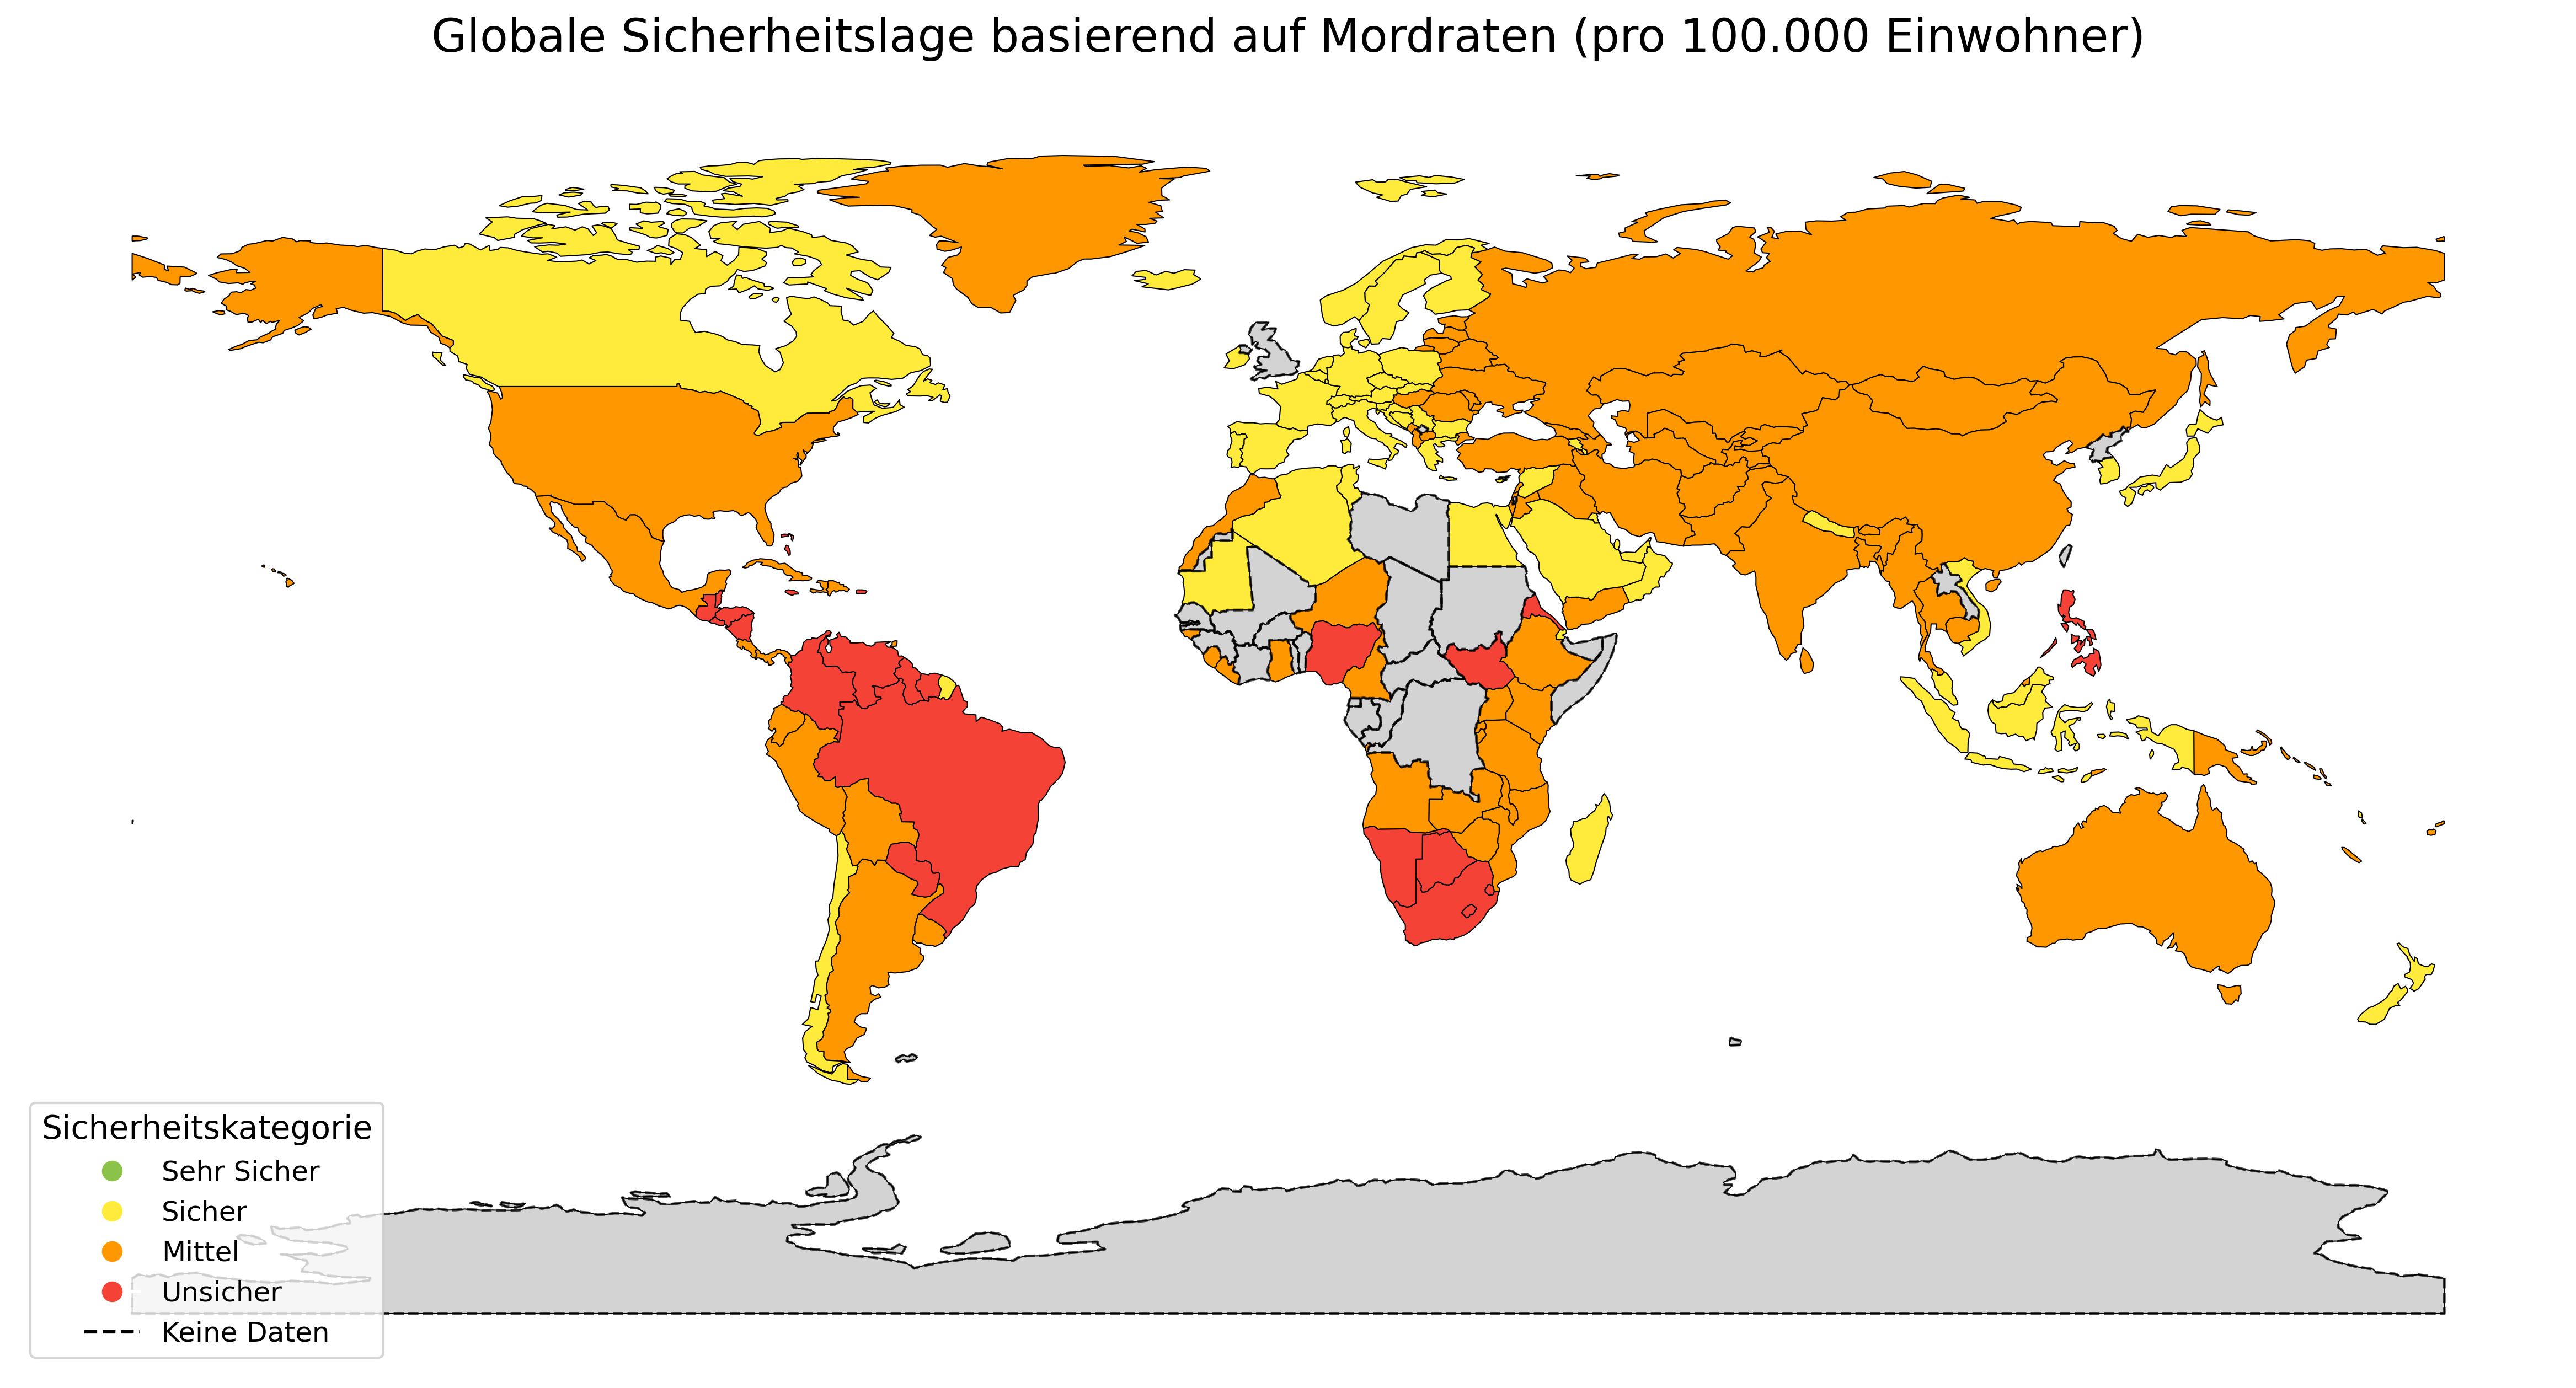

In [97]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Figurenparameter anpassen für hohe Auflösung
plt.figure(dpi=300)  # Erhöht die Auflösung der Karte
fig, ax = plt.subplots(1, 1, figsize=(20, 10), dpi=300)

# Farben und Farbschema definieren
color_mapping = {
    'Sehr Sicher': '#8BC34A',  # Grün
    'Sicher': '#FFEB3B',       # Gelb
    'Mittel': '#FF9800',       # Orange
    'Unsicher': '#F44336',     # Rot
    'No Data': 'lightgrey'     # Grau für fehlende Daten
}

# Farben auf die Weltkarte anwenden
world['color'] = world['Safety Category'].map(color_mapping)

# Ländergrenzen betonen und Plot erstellen
world.plot(
    color=world['color'],
    edgecolor='black',
    linewidth=0.5,  # Feine Ländergrenzen
    ax=ax
)

# Rahmen für fehlende Daten (optional mit Schraffur)
world[world['Safety Category'] == 'No Data'].boundary.plot(
    ax=ax,
    edgecolor='black',
    linewidth=1.2,
    linestyle='--',
    alpha=0.7
)

# Titel und Achsen entfernen
ax.set_title("Globale Sicherheitslage basierend auf Mordraten (pro 100.000 Einwohner)", fontsize=20, pad=20)
ax.set_axis_off()

# Legende mit angepassten Parametern
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='#8BC34A', markersize=10, label='Sehr Sicher'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='#FFEB3B', markersize=10, label='Sicher'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='#FF9800', markersize=10, label='Mittel'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='#F44336', markersize=10, label='Unsicher'),
    Line2D([0], [0], color='black', linestyle='--', label='Keine Daten')
]

ax.legend(handles=legend_elements, loc='lower left', title="Sicherheitskategorie", fontsize=12, title_fontsize=14)

# Speichern der Karte mit hoher Qualität
plt.savefig("globale_sicherheitslage.png", format='png', dpi=300, bbox_inches='tight')

# Karte anzeigen
plt.show()
